<a href="https://colab.research.google.com/github/head1ton/kaggle_dev/blob/master/MNIST_Simple_CNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

# from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
import os
print(os.listdir('./'))

['.config', 'train.csv', 'test.csv', 'sample_submission.csv', 'sample_data']


In [3]:
# Data preparation
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sub = pd.read_csv('./sample_submission.csv')
print('Data are Ready')

Data are Ready


In [4]:
print(f"Training data size is {train.shape}\nTesting data size is {test.shape}")

Training data size is (42000, 785)
Testing data size is (28000, 784)


In [0]:
# Set data features and labels
X = train.drop(['label'], 1).values
y = train['label'].values

test_x = test.values

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
y

array([1, 0, 1, ..., 7, 6, 9])

In [8]:
test_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
# Normalization
X = X / 255.0
test_x = test_x / 255.0

In [0]:
# Reshape image in 3 dimensions (height, width, canal) canal=1(gray), 3(rgb)
X = X.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

In [11]:
# Label encoding
# one-hot encoding
y = to_categorical(y)

print(f"Label size {y.shape}")

Label size (42000, 10)


In [12]:
pd.DataFrame(y)

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [0]:
# Split training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

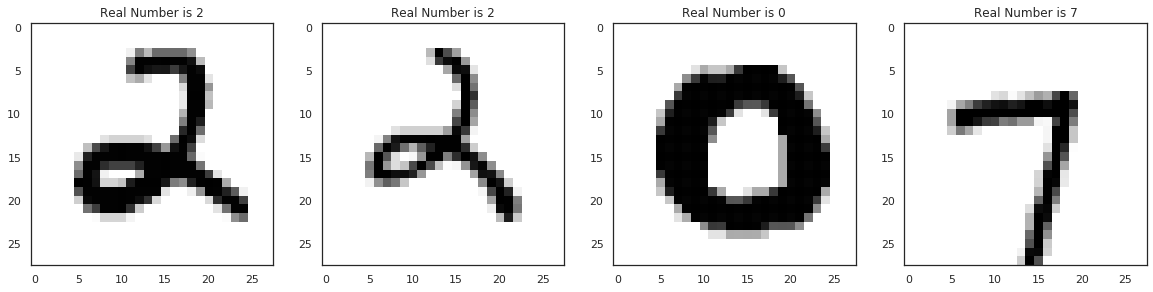

In [16]:
# Data Visualization
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
print(axis)
print(axis.flat)
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title=f'Real Number is {digit}')

In [0]:
# Normalization
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

In [0]:
epochs = 50
batch_size = 64

In [19]:
model = Sequential()

# model.add(Lambda(standardize, input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Data augmentation
datagen = ImageDataGenerator(
    featurewise_center = False,
    samplewise_center = False,
    featurewise_std_normalization = False,
    samplewise_std_normalization = False,
    zca_whitening = False,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = False,
    vertical_flip = False
)

train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, y_test, batch_size=batch_size)

In [0]:
# Model training
# model.fit(X, y, batch_size=batch_size, validation_split=0.2, epochs=10)

In [32]:
# fit the model
epochs = 3 # imsi
history = model.fit_generator(train_gen,
                              epochs=epochs,
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)

Epoch 1/3
590/590 [==============================] - 275s 467ms/step - loss: 0.0273 - acc: 0.9915 - val_loss: 0.0511 - val_acc: 0.9841
Epoch 2/3
590/590 [==============================] - 276s 468ms/step - loss: 0.0286 - acc: 0.9913 - val_loss: 0.0418 - val_acc: 0.9886
Epoch 3/3
590/590 [==============================] - 276s 468ms/step - loss: 0.0272 - acc: 0.9916 - val_loss: 0.0576 - val_acc: 0.9845


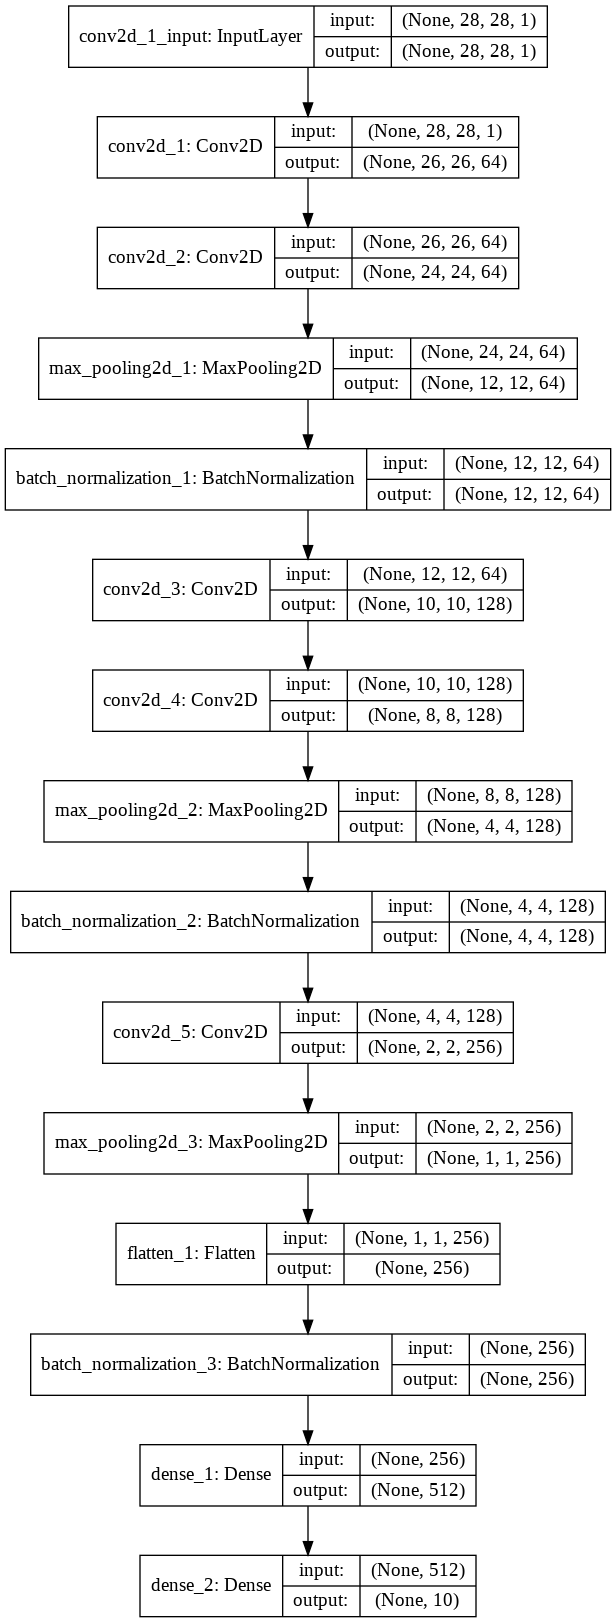

In [28]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
history

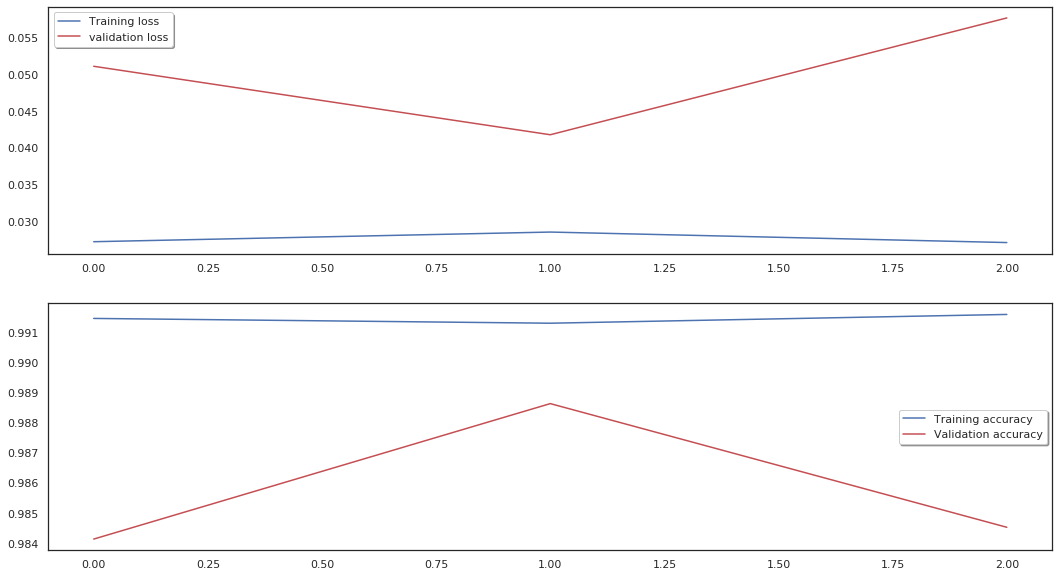

In [33]:
# Evaluate the model
# Training and validation curves
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

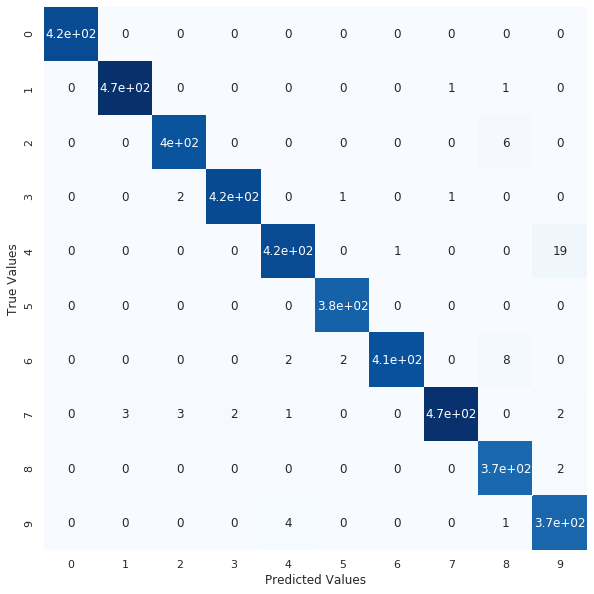

In [34]:
# confusion matrix
fig = plt.figure(figsize=(10, 10))
y_pred = model.predict(X_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(y_test, 1)

mat = confusion_matrix(Y_test, Y_pred)

sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

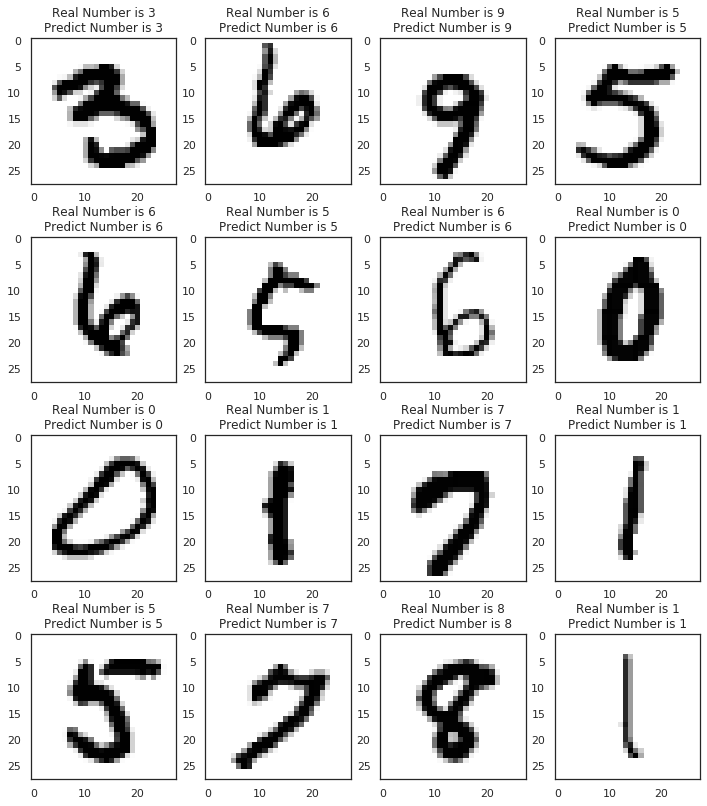

In [35]:
# Prediction and submition
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f'Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}')

In [36]:
pred = model.predict_classes(test_x, verbose=1)

28000/28000 [==============================] - 40s 1ms/step


In [37]:
sub['Label'] = pred
sub.to_csv("CNN_keras_sub.csv", index=False)
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
